In [70]:
#Write a program to implement Decision Tree classifier to find accuracy for training and test fruit data set.

import pandas as pd

fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names = ['mass', 'width', 'height', 'color_score']   #all attributes

X = fruits[feature_names]
y = fruits['fruit_label']                                # y only label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X_train)
X1_test = scaler.transform(X_test)

# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X1_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X1_train, y1_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [72]:
#Classification report
from sklearn import metrics
import numpy as np
y_pred=np.around(clf.predict(X1_test))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       1.00      1.00      1.00         2

    accuracy                           0.87        15
   macro avg       0.92      0.94      0.91        15
weighted avg       0.91      0.87      0.87        15



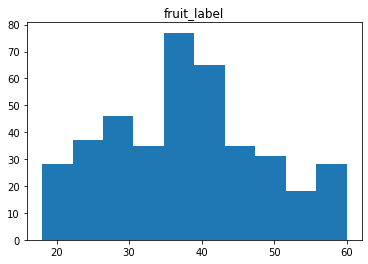

In [73]:
#Histogram for dataset.
import matplotlib.pyplot as plt
plt.title('fruit_label')
plt.hist(data_set.Age)
plt.show()

(array([[ 4.,  9., 13., 11.,  5.,  0.,  0.,  0.,  0.,  2.],
        [11.,  2.,  2.,  4., 12.,  9.,  1.,  1.,  0.,  2.],
        [ 3.,  1.,  0.,  0.,  8., 15.,  9.,  4.,  2.,  2.],
        [ 1.,  1.,  0.,  3., 15.,  8.,  3.,  7.,  4.,  2.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 4 BarContainer objects>)

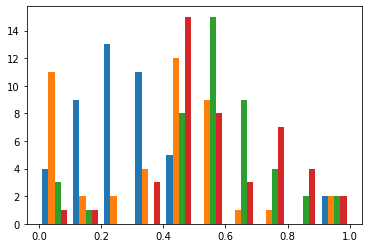

In [74]:
plt.hist(X1_train)

(array([[1., 3., 5., 4., 1., 0., 0., 0., 0., 1.],
        [1., 0., 2., 7., 4., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 7., 4., 0., 1., 2., 0.],
        [1., 0., 0., 3., 4., 4., 0., 1., 1., 1.]]),
 array([0.02857143, 0.13747899, 0.24638655, 0.35529412, 0.46420168,
        0.57310924, 0.68201681, 0.79092437, 0.89983193, 1.0087395 ,
        1.11764706]),
 <a list of 4 BarContainer objects>)

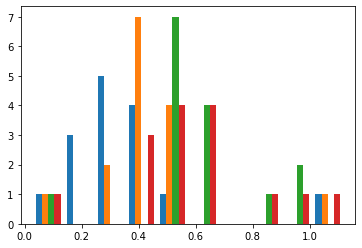

In [75]:
plt.hist(X1_test)

In [8]:
#2. Write a program to Build an Artificial Neural Network by implementing the Back-propagation algorithm and test the same using appropriate data sets.
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
     return x * (1 - x)

#Variable initialization
epoch=7000      #Setting training iterations
lr=0.1          #Setting learning rate
inputlayer_neurons = 2     #number of features in data set
hiddenlayer_neurons = 3     #number of hidden layers neurons
output_neurons = 1     #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):

#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)

#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act) #how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr # dotproduct of nextlayererror and currentlayerop

     # bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
     #bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n",output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89442461]
 [0.88228928]
 [0.89322261]]


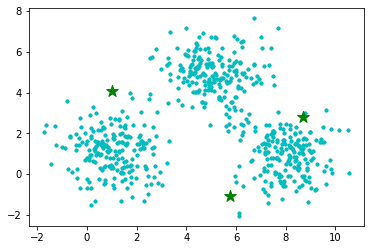

In [9]:
#3. Write a program to implement K-means clustering using random samples
from copy import deepcopy

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data = np.concatenate((data_1, data_2, data_3), axis = 0)
plt.scatter(data[:,0], data[:,1], s=7)

# Number of clusters
k = 3

# Number of training data
n = data.shape[0]

# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=9,color='c')
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
plt.show()

In [81]:
#4. Write a program to implement K- Nearest Neighbors’ classifier to find accuracy for training and test fruit data set.
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [82]:
#importing datasets  
data_set= pd.read_csv('user_data.csv') 
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [83]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [84]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x2_train= st_x.fit_transform(x_train)    
x2_test= st_x.transform(x_test) 

In [88]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x2_train, y2_train)  

KNeighborsClassifier()

In [89]:
#Predicting the test set result  
y_pred= classifier.predict(x2_test)  

In [90]:
from sklearn.metrics import accuracy_score
print ('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.93


In [91]:
#Classification report
from sklearn import metrics
import numpy as np
y_pred=np.around(classifier.predict(x2_test))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



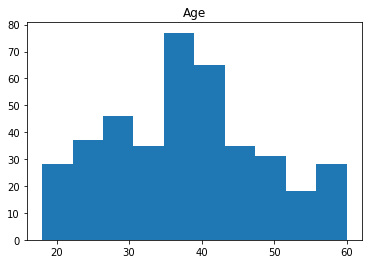

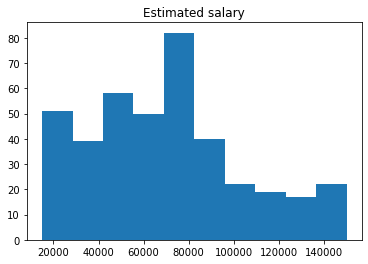

In [46]:
#Histogram for dataset.
import matplotlib.pyplot as plt
plt.title('Age')
plt.hist(data_set.Age)
plt.show()
plt.title('Estimated salary')
plt.hist(data_set.EstimatedSalary)
plt.show()

(array([[10., 12., 16., 14., 11., 12.,  9.,  5.,  4.,  7.],
        [ 1., 11., 12., 20.,  8., 31.,  4.,  4.,  3.,  6.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

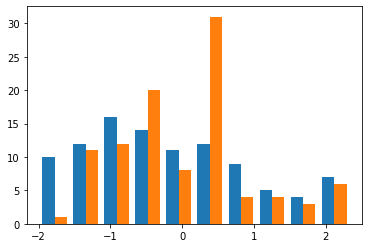

In [92]:
plt.hist(x2_test)

(array([[18., 25., 41., 42., 49., 40., 38., 18., 16., 13.],
        [ 3., 42., 39., 46., 61., 43., 13., 21., 16., 16.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

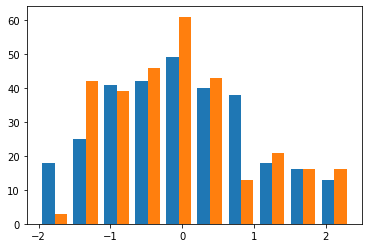

In [93]:
plt.hist(x2_train)

In [94]:
#5. Write a program to logistic regression
#Data Pre-procesing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('user_data.csv')  
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [95]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [96]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [97]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [98]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

LogisticRegression(random_state=0)

In [99]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [100]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [101]:
from sklearn.metrics import accuracy_score
print ('Accuracy :', accuracy_score(y_test, y_pred))  

Accuracy : 0.89


In [102]:
#Classification report
from sklearn import metrics
import numpy as np
y_pred=np.around(classifier.predict(x_test))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



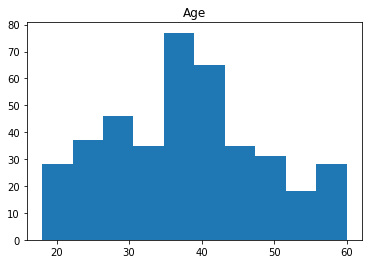

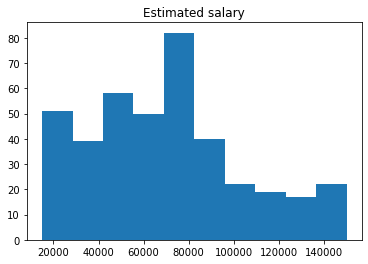

In [103]:
#Histogram for dataset.
import matplotlib.pyplot as plt
plt.title('Age')
plt.hist(data_set.Age)
plt.show()
plt.title('Estimated salary')
plt.hist(data_set.EstimatedSalary)
plt.show()

(array([[10., 12., 16., 14., 11., 12.,  9.,  5.,  4.,  7.],
        [ 1., 11., 12., 20.,  8., 31.,  4.,  4.,  3.,  6.]]),
 array([-1.99318916, -1.56071704, -1.12824493, -0.69577281, -0.26330069,
         0.16917142,  0.60164354,  1.03411565,  1.46658777,  1.89905989,
         2.331532  ]),
 <a list of 2 BarContainer objects>)

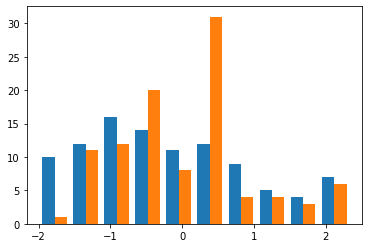

In [104]:
plt.hist(x_test)

In [31]:
#Write a program to implement SVM classifier to find accuracy for training and test fruit data set.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
Y = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

svm = SVC().fit(X_train, Y_train)

print('Accuracy of SVM classifier on training set : {:.2f}'.format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on testing set : {:.2f}'.format(svm.score(X_test, Y_test)))

Accuracy of SVM classifier on training set : 0.91
Accuracy of SVM classifier on testing set : 0.60
